# Data visualization

Before all, it is important to get to know the data.

The PRE2013 dataset regards agromet data. Data was gathered by:
1. High-frequency devices, which extract the NEE (Net Ecosystem Carbon Exchange or carbon sequestration by the ecosystem) and LE (Latent Energy, which has to do with the flux of water vapor)
2. Low-frequency devices, which directly measures the remaining data (Rg, Tair, Tsoil, rH, VPD and Ustar)

Lets then import the data into standard dataframe and plot some graphs to know the nuances.

In [2]:
import pandas as pd

df_uncleaned = pd.read_excel('PRE2013.xlsx')
df_uncleaned

,Day,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,VPD,Ustar
0,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,hPa,ms-1
1,1,0.5,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2,1,1,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
3,1,1.5,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,1,2,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...
17516,365,22,1.317576,-2.113446,-4.222929,-1.650576,24.11463,29.31614,84.10452,4.693953,0.341839
17517,365,22.5,0.234337,-17.096266,1.974016,-2.103711,23.99404,29.22911,86.27364,4.024035,0.374856
17518,365,23,-0.224384,-10.566178,-5.732129,-2.074909,23.87093,29.14392,87.43149,3.657315,0.360931
17519,365,23.5,1.597789,-9.588491,-4.534221,-2.309459,23.6706,29.05899,88.96199,3.173296,0.431153


Watch out that the first row (index 0) corresponds to units, so do not consider for plottting

Lets plot then the first 999 rows to know what happens at the beginning of the main time series (NEE).

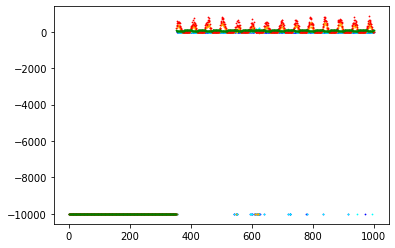

In [3]:
import matplotlib.pyplot as plt

plt.plot(df_uncleaned['NEE'][1:1000], color = 'blue', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['LE'][1:1000], color = 'cyan', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['H'][1:1000], color = 'orange', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['Rg'][1:1000], color = 'red', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['rH'][1:1000], color = 'green', marker = '.', linestyle = ' ', markersize = '1.5')

As we see:
1. The dataset starts with a big gap (marked as -9999 values) in all time series.
2. After the big gap at the begining, not all the gaps coincide in all time series. This is important as thanks to this, we could try the goal of using data of environmental time series to fill the gaps of the main series (NEE, LE and H)

Lets take the following 1000 rows to check whether we find the same pattern.

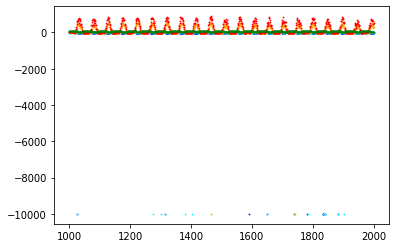

In [4]:
plt.plot(df_uncleaned['NEE'][1000:2000], color = 'blue', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['LE'][1000:2000], color = 'cyan', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['H'][1000:2000], color = 'orange', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['Rg'][1000:2000], color = 'red', marker = '.', linestyle = ' ', markersize = '1.5')
plt.plot(df_uncleaned['rH'][1000:2000], color = 'green', marker = '.', linestyle = ' ', markersize = '1.5')

Not that much. Therefore, for the time series of the whole year we can expect:
1. Big data gaps of several days, due to general failure, probably due to blackouts of power supply.
2. Punctuated data gaps due to failure of particular devices, mostly on high-frequency ones.

If we plot data taken from high-frequency devices (such as NEE) versus data taken from low-frequency devices (such as Rg), we can see the second point better: there more gaps due to the former than due to the latter.


Text(0, 0.5, 'NEE')

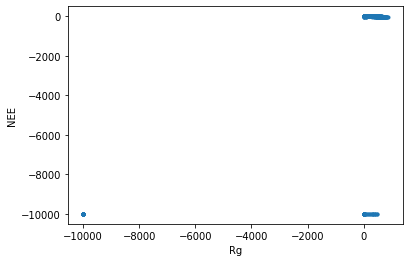

In [11]:
plt.plot(df_uncleaned['Rg'][1:1000], df_uncleaned['NEE'][1:1000], linestyle='', marker='.')
plt.xlabel('Rg')
plt.ylabel('NEE')

As I analyzed in data_preprocessing ipy notebook, NEE highly correlates Rg. Lets visualize if that proceeds.

(-20.0, 20.0)

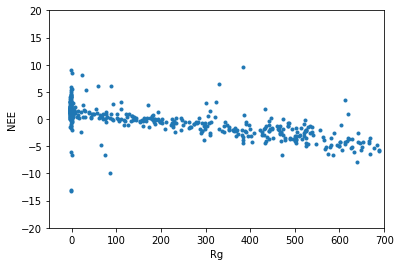

In [10]:
plt.plot(df_uncleaned['Rg'][1:1000], df_uncleaned['NEE'][1:1000], linestyle='', marker='.')
plt.xlabel('Rg')
plt.ylabel('NEE')
plt.xlim([-50,700])
plt.ylim([-20,20])

Also, it was found some corr between NEE and rH. Lets see that.

(-20.0, 20.0)

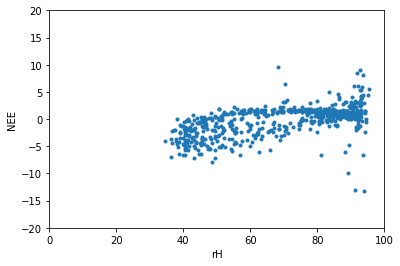

In [13]:
plt.plot(df_uncleaned['rH'][1:1000], df_uncleaned['NEE'][1:1000], linestyle='', marker='.')
plt.xlabel('rH')
plt.ylabel('NEE')
plt.xlim([0,100])
plt.ylim([-20,20])

There is also corr between NEE and Hour (of the day), but the corr analysis done there did not detected. This is because:
1. During nighttime, there is no corr at all.
2. During dawn up to midday, there is negative corr (Hour increase, but NEE decrease)
3. From midday up to nighttime, there is positive corr (Hour increase and NEE increases too)

I will not consider firstly Hour into the ML model, but depending on the results I should consider split/classify the data into these 3 cats for improving my data mining.


(-20.0, 20.0)

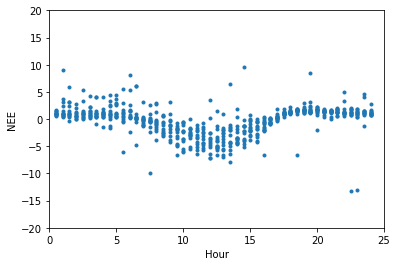

In [9]:
plt.plot(df_uncleaned['Hour'][1:1000], df_uncleaned['NEE'][1:1000], linestyle= '', marker= '.')
plt.xlabel('Hour')
plt.ylabel('NEE')
plt.xlim([0,25])
plt.ylim([-20,20])